## Upload Required Libraries

In [1]:
## Upload Required Libraries

In [2]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings 
warnings.filterwarnings( "ignore")


In [3]:
## Importing data

election_df=pd.read_excel("Election_Data.xlsx",'Election_Dataset_Two Classes',index_col=0)



In [4]:
election_df.shape

(1525, 9)

In [5]:
election_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [6]:
election_df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1521,Conservative,67,5,3,2,4,11,3,male
1522,Conservative,73,2,2,4,4,8,2,male
1523,Labour,37,3,3,5,4,2,2,male
1524,Conservative,61,3,3,1,4,11,2,male
1525,Conservative,74,2,3,2,4,11,0,female


In [7]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [8]:
election_df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [9]:
election_df.describe(include='object')

,vote,gender
count,1525,1525
unique,2,2
top,Labour,female
freq,1063,812


In [10]:
df_num = election_df.select_dtypes(include = ['float64', 'int64'])


In [11]:

lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

age
Skew : 0.14


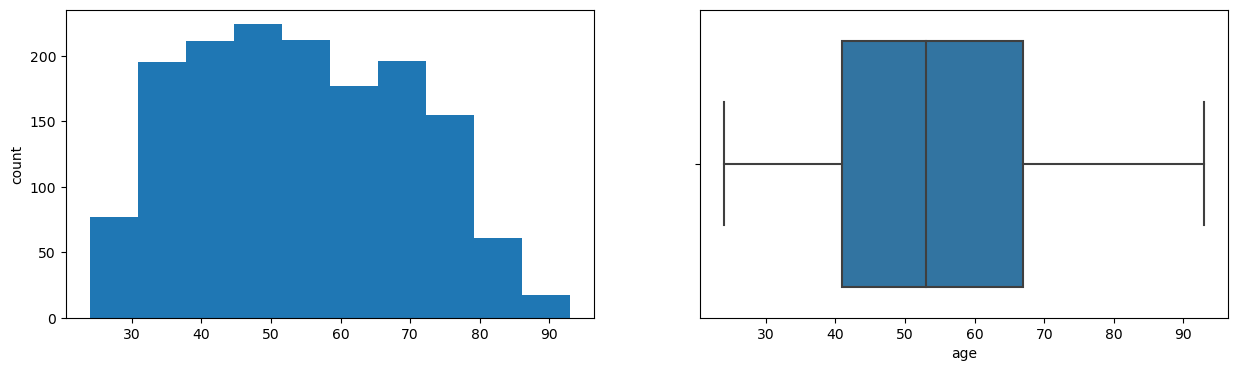

economic.cond.national
Skew : -0.24


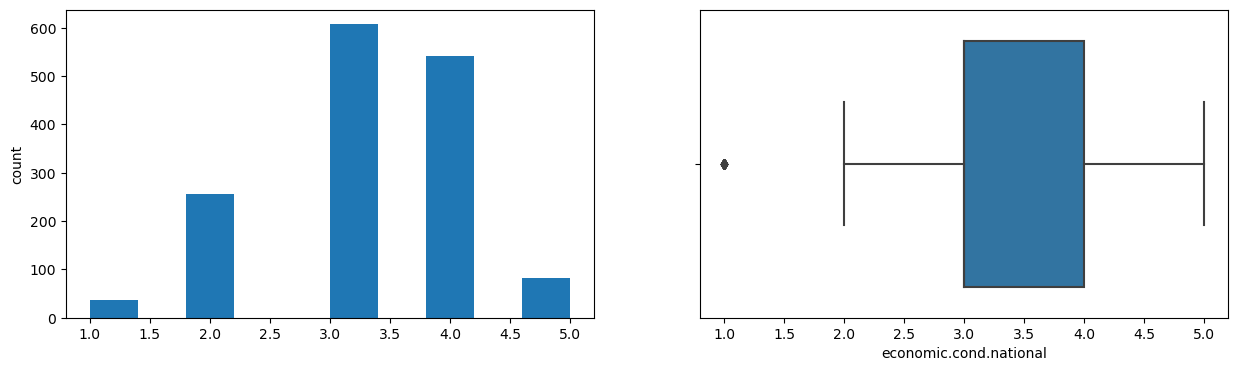

economic.cond.household
Skew : -0.15


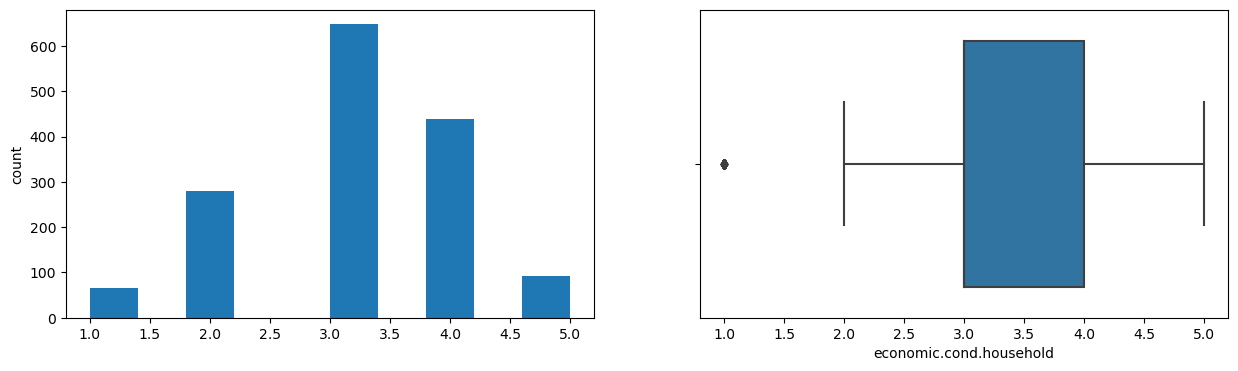

Blair
Skew : -0.54


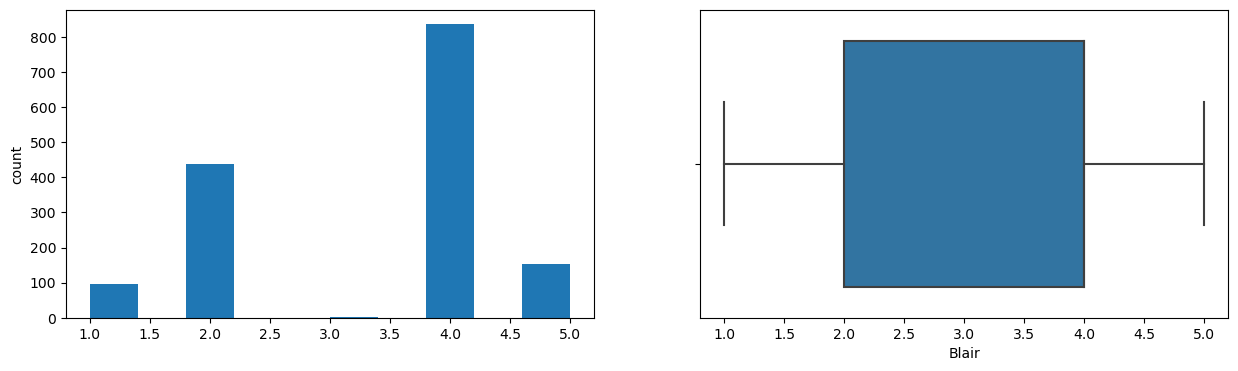

Hague
Skew : 0.15


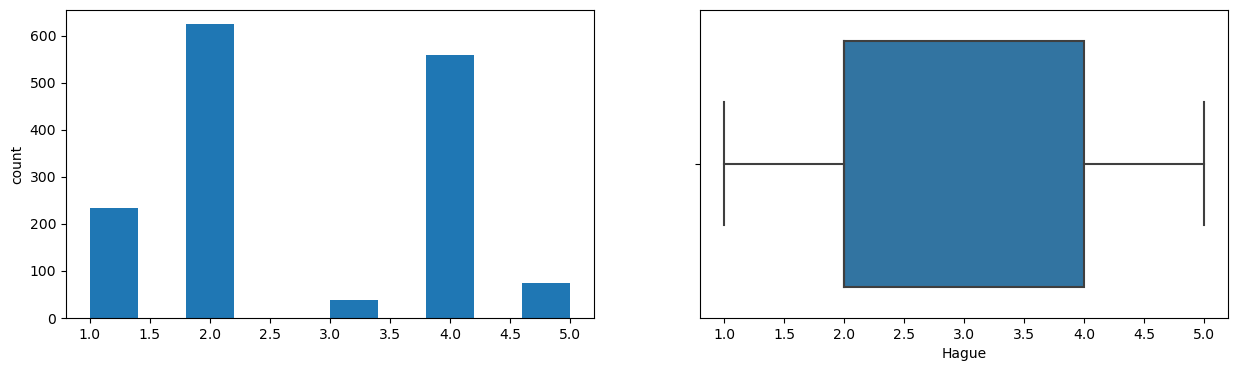

Europe
Skew : -0.14


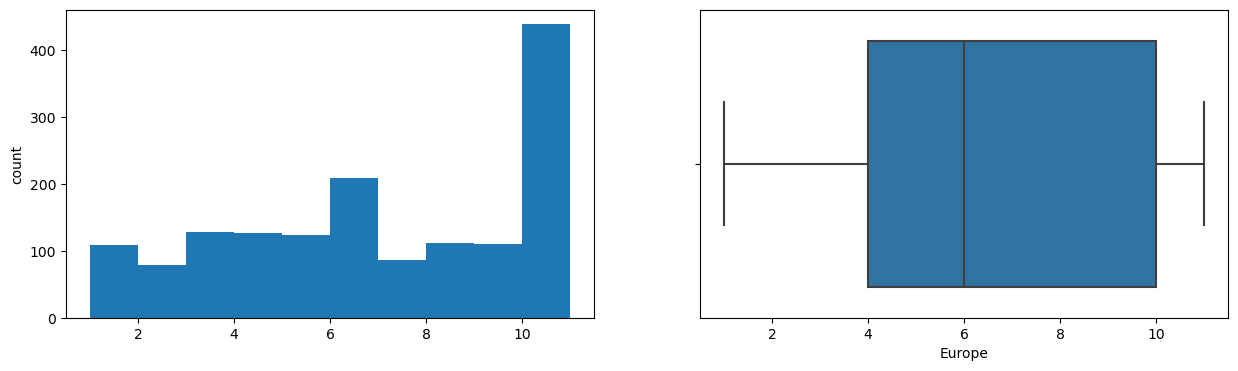

political.knowledge
Skew : -0.43


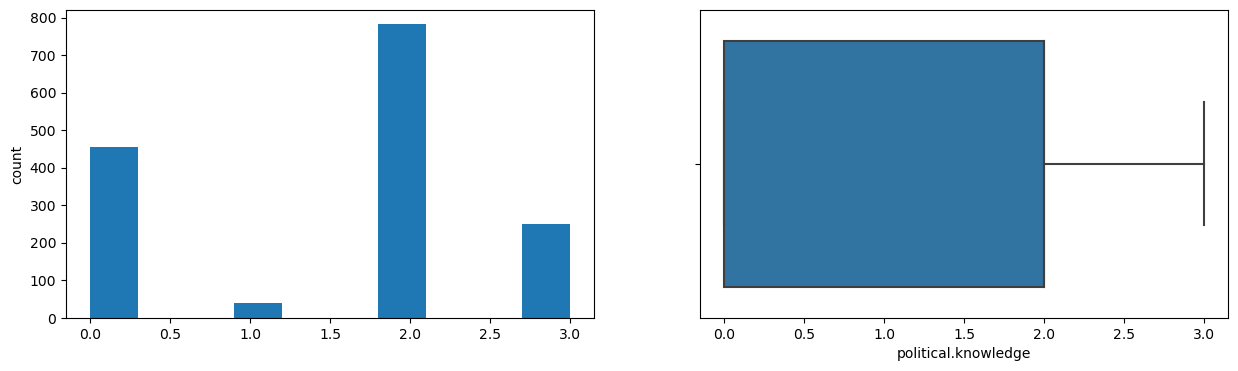

In [12]:
for col in lstnumericcolumns:
    print(col)
    print('Skew :',round(election_df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    election_df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=election_df[col])
    plt.show()

In [13]:
def univariateAnalysis_category(cat_column):
    df=election_df
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    plt.figure(figsize=(12, 8))
    plots = df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plt.show()
    print("       ")

In [14]:
df_cat = election_df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['vote', 'gender']

Details of vote
----------------------------------------------------------------
vote
Labour          1063
Conservative     462
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

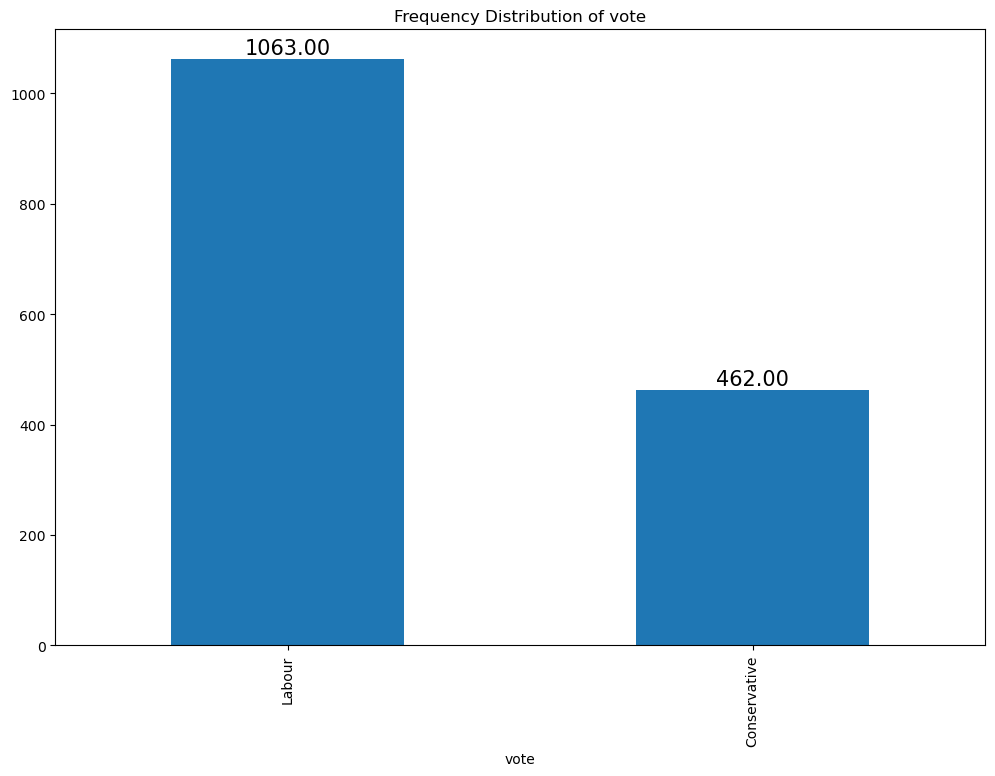

       
Details of gender
----------------------------------------------------------------
gender
female    812
male      713
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

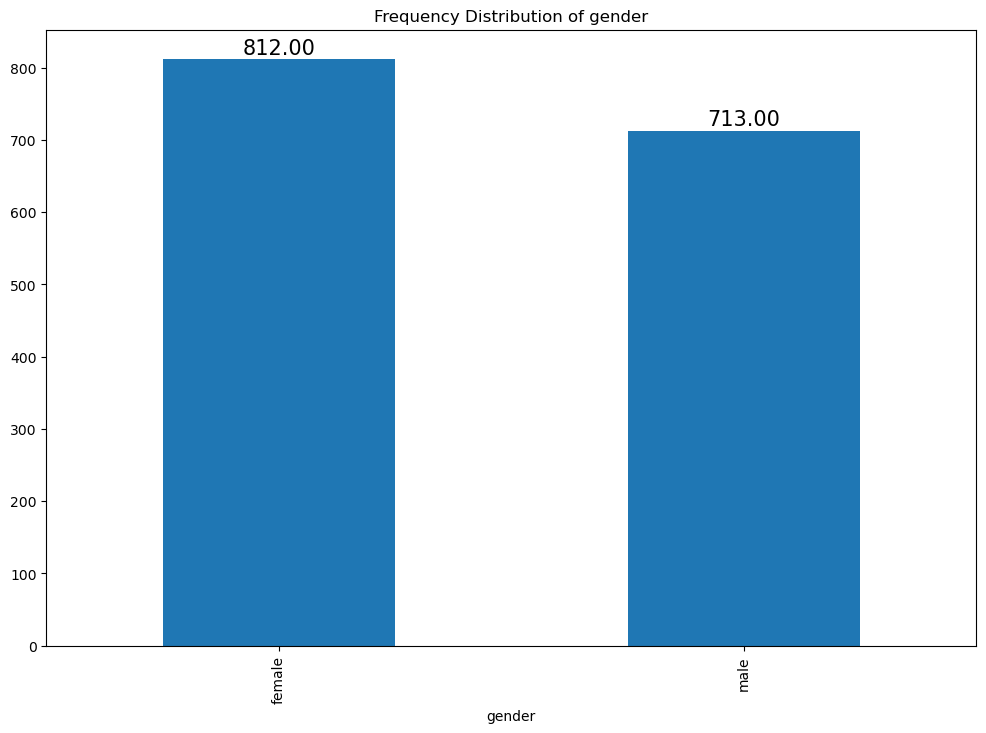

In [15]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

In [16]:
from matplotlib.cbook import boxplot_stats 

def bivariateAnalysis_numeric(column,nbins):
    df=election_df
    
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    sns.boxplot(x=df[column],y=df['vote'],dodge=False)
    #ax.legend()
    plt.show()

In [17]:
print(election_df.groupby(['vote','Blair'])['Blair'].count())

vote          Blair
Conservative  1         59
              2        242
              3          1
              4        157
              5          3
Labour        1         38
              2        196
              4        679
              5        150
Name: Blair, dtype: int64


<Axes: xlabel='Blair', ylabel='count'>

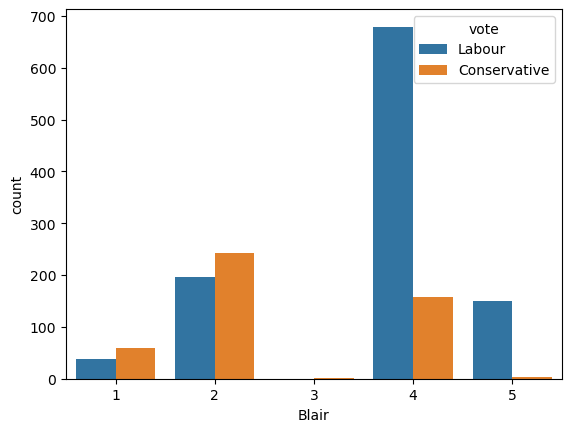

In [18]:
sns.countplot(x=election_df['Blair'], hue=election_df['vote'])

BoxPlot of age
----------------------------------------------------------------------------


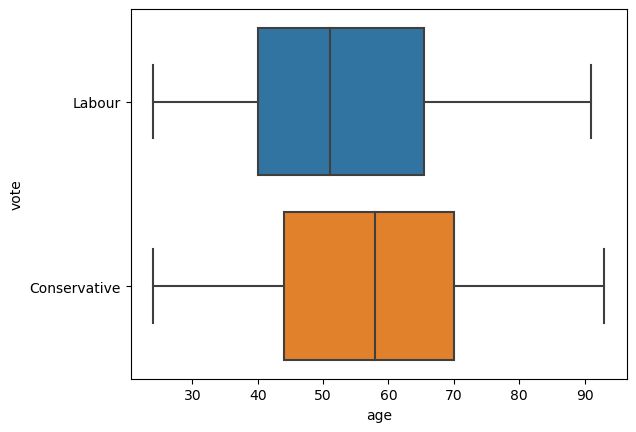

BoxPlot of economic.cond.national
----------------------------------------------------------------------------


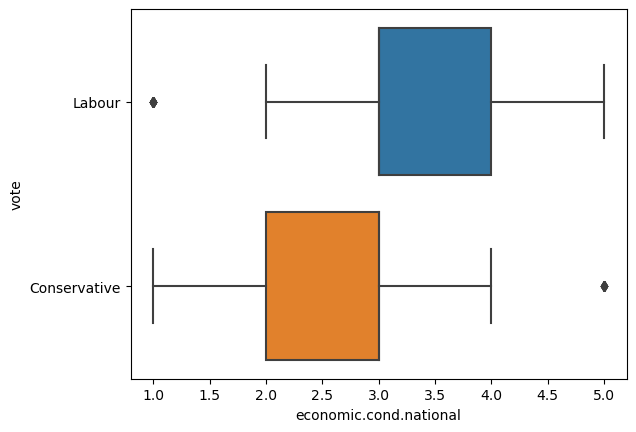

BoxPlot of economic.cond.household
----------------------------------------------------------------------------


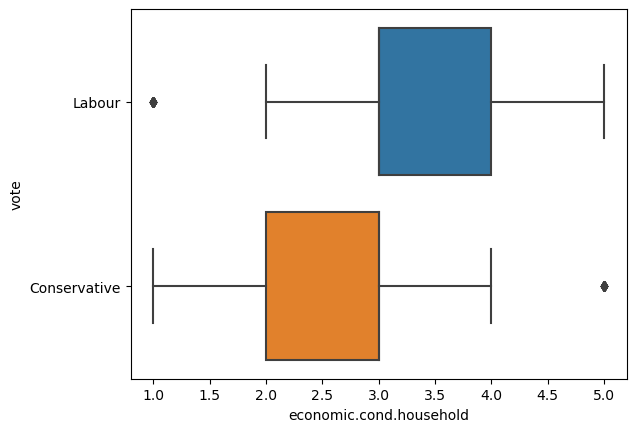

BoxPlot of Blair
----------------------------------------------------------------------------


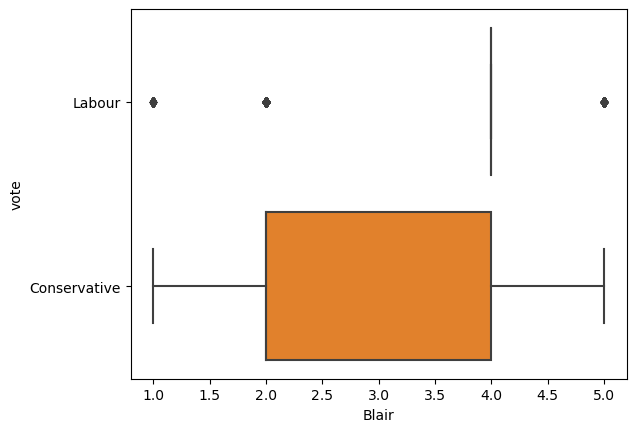

BoxPlot of Hague
----------------------------------------------------------------------------


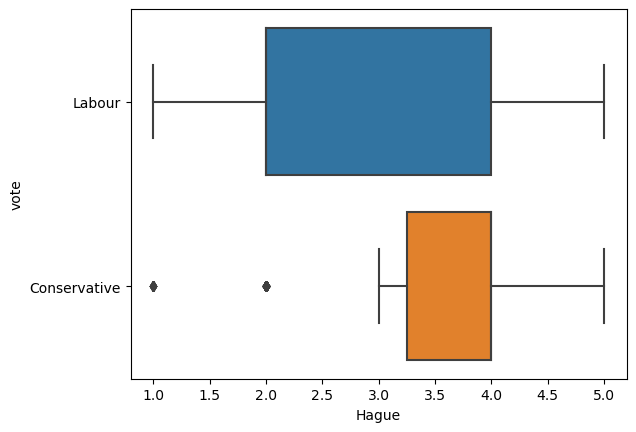

BoxPlot of Europe
----------------------------------------------------------------------------


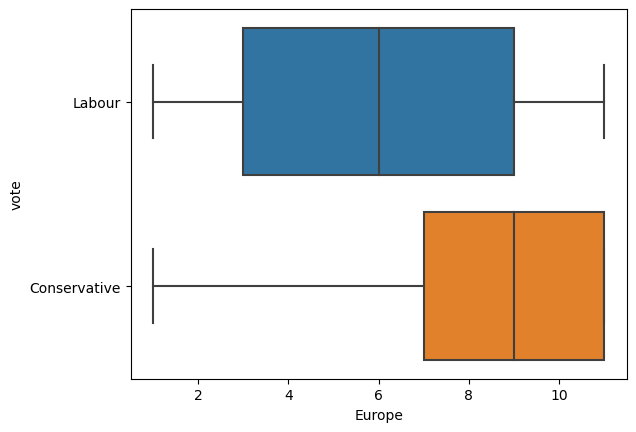

BoxPlot of political.knowledge
----------------------------------------------------------------------------


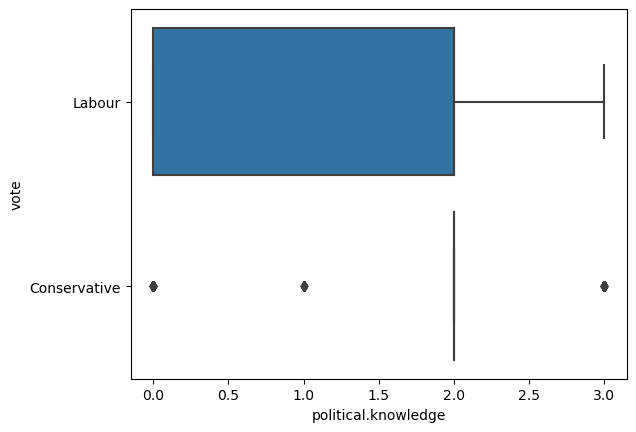

In [19]:
for x in lstnumericcolumns:
    bivariateAnalysis_numeric(x,20)

In [20]:
def bivariateCategoryAnalysis(column,nbins):
    df=election_df
    if (column!='vote'):
        print("Count Plot of " + column+ " vs vote")
        print("----------------------------------------------------------------------------")
        sns.countplot(x=df[column],hue=df['vote'])
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.show()

Count Plot of gender vs vote
----------------------------------------------------------------------------


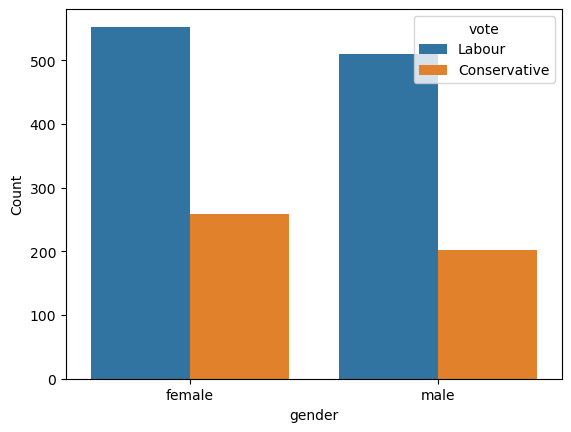

In [21]:
for x in lstcatcolumns:
    bivariateCategoryAnalysis(x,20)

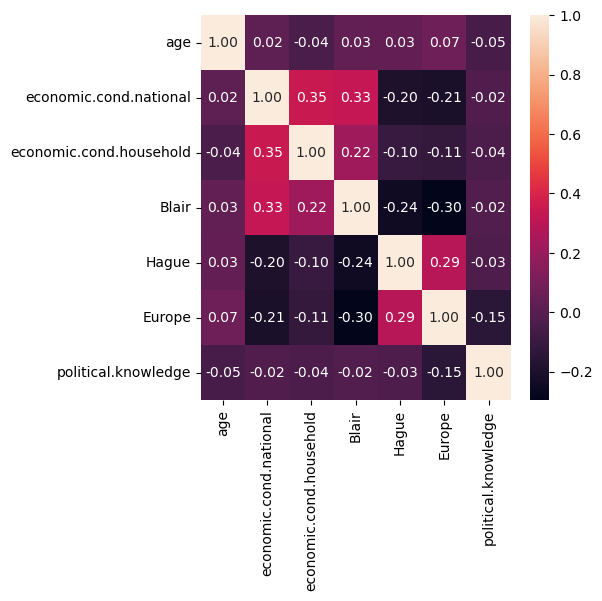

In [22]:

plt.figure(figsize=(5,5))

sns.heatmap(df_num.corr(),annot=True,fmt=".2f");

<Figure size 2500x1500 with 0 Axes>

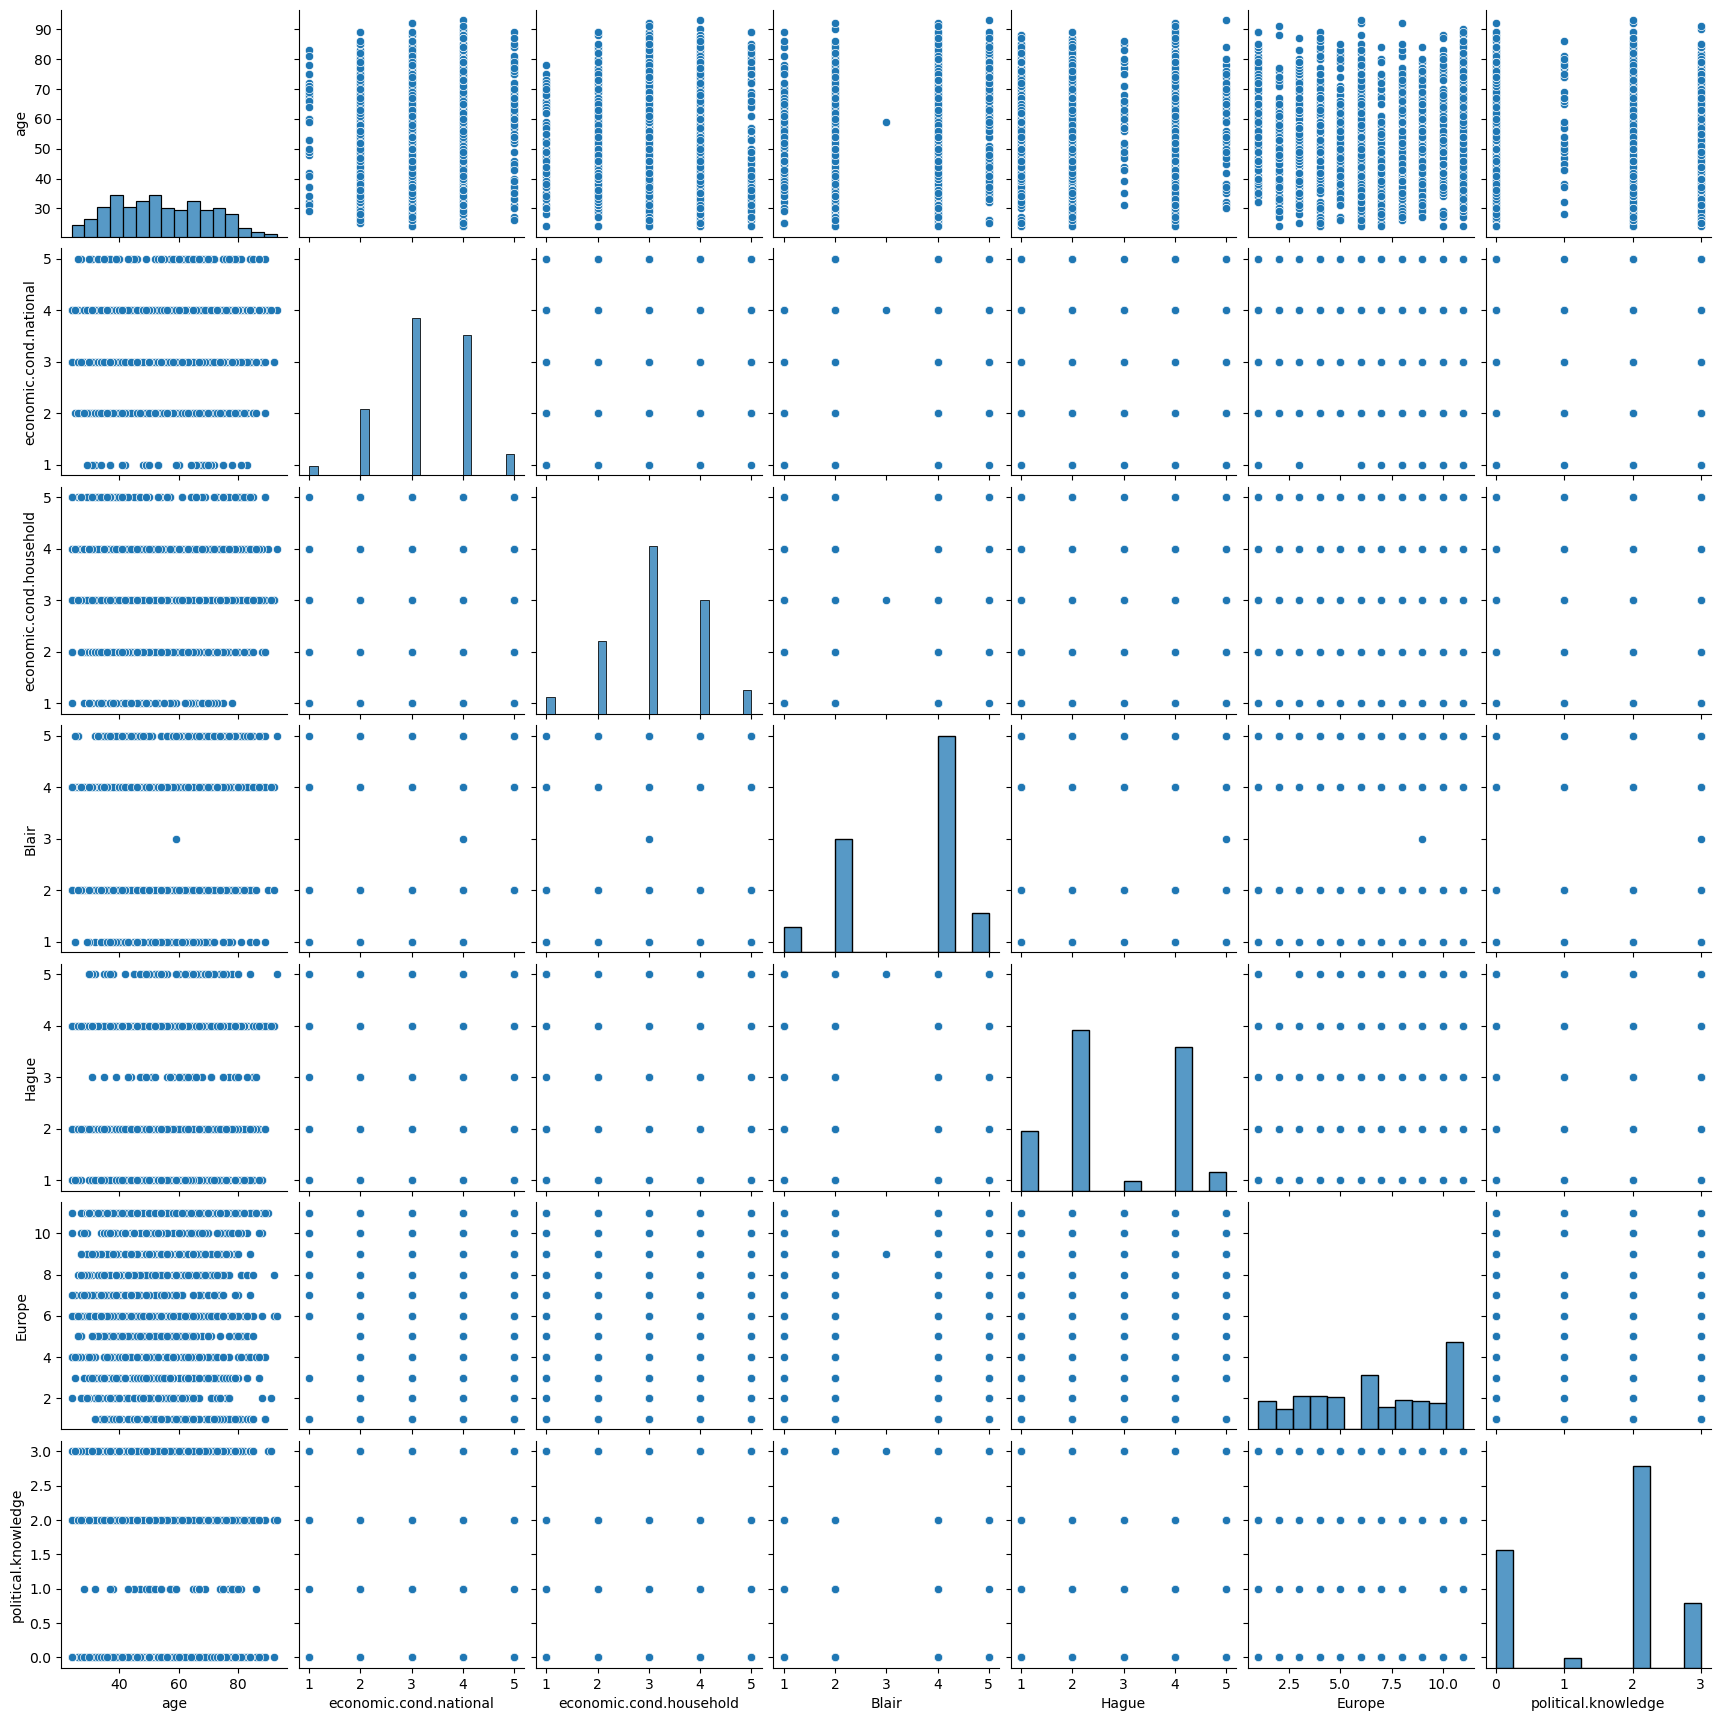

In [23]:
plt.figure(figsize=(25,15))
sns.pairplot(data=election_df)

### Missing Value Treatment

### Imputing missing values

In [24]:
election_df.isna().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

### Check for duplicate data

In [25]:
dups = election_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(election_df.shape)

Number of duplicate rows = 8
(1525, 9)


In [26]:
election_df.drop_duplicates(inplace=True) 

In [27]:
dups = election_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(election_df.shape)

Number of duplicate rows = 0
(1517, 9)


### Outlier Treatment

In [28]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

In [29]:
# The count of outliers in each column

((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()

age                         0
economic.cond.national     37
economic.cond.household    65
Blair                       0
Hague                       0
Europe                      0
political.knowledge         0
dtype: int64

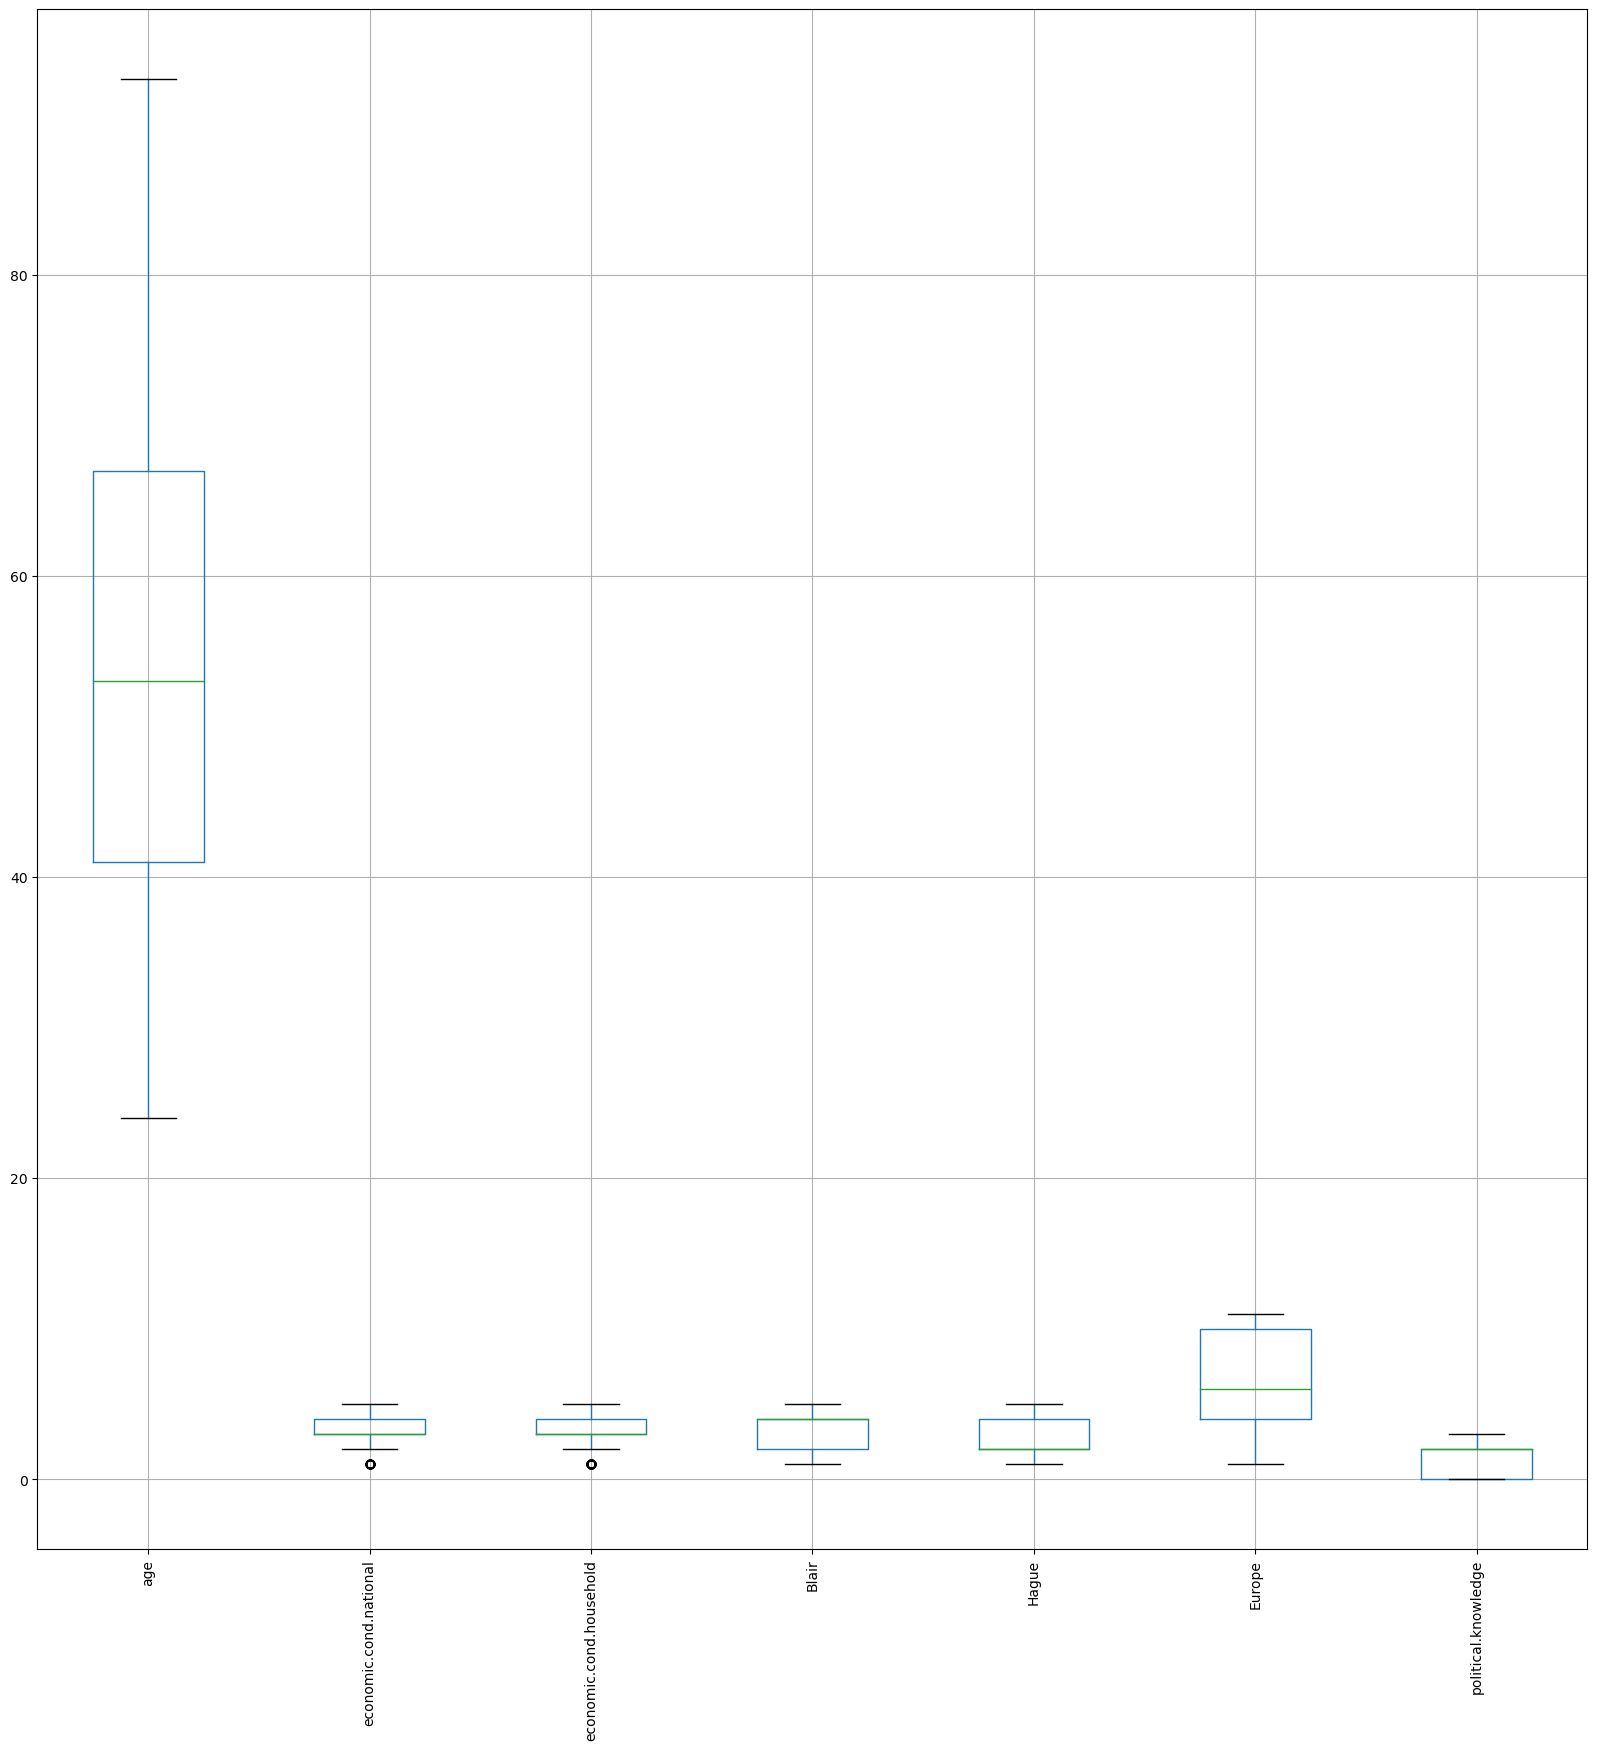

In [30]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [31]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    q95=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [32]:
for i in df_num:    
    df_num[i]=treat_outlier(df_num[i])

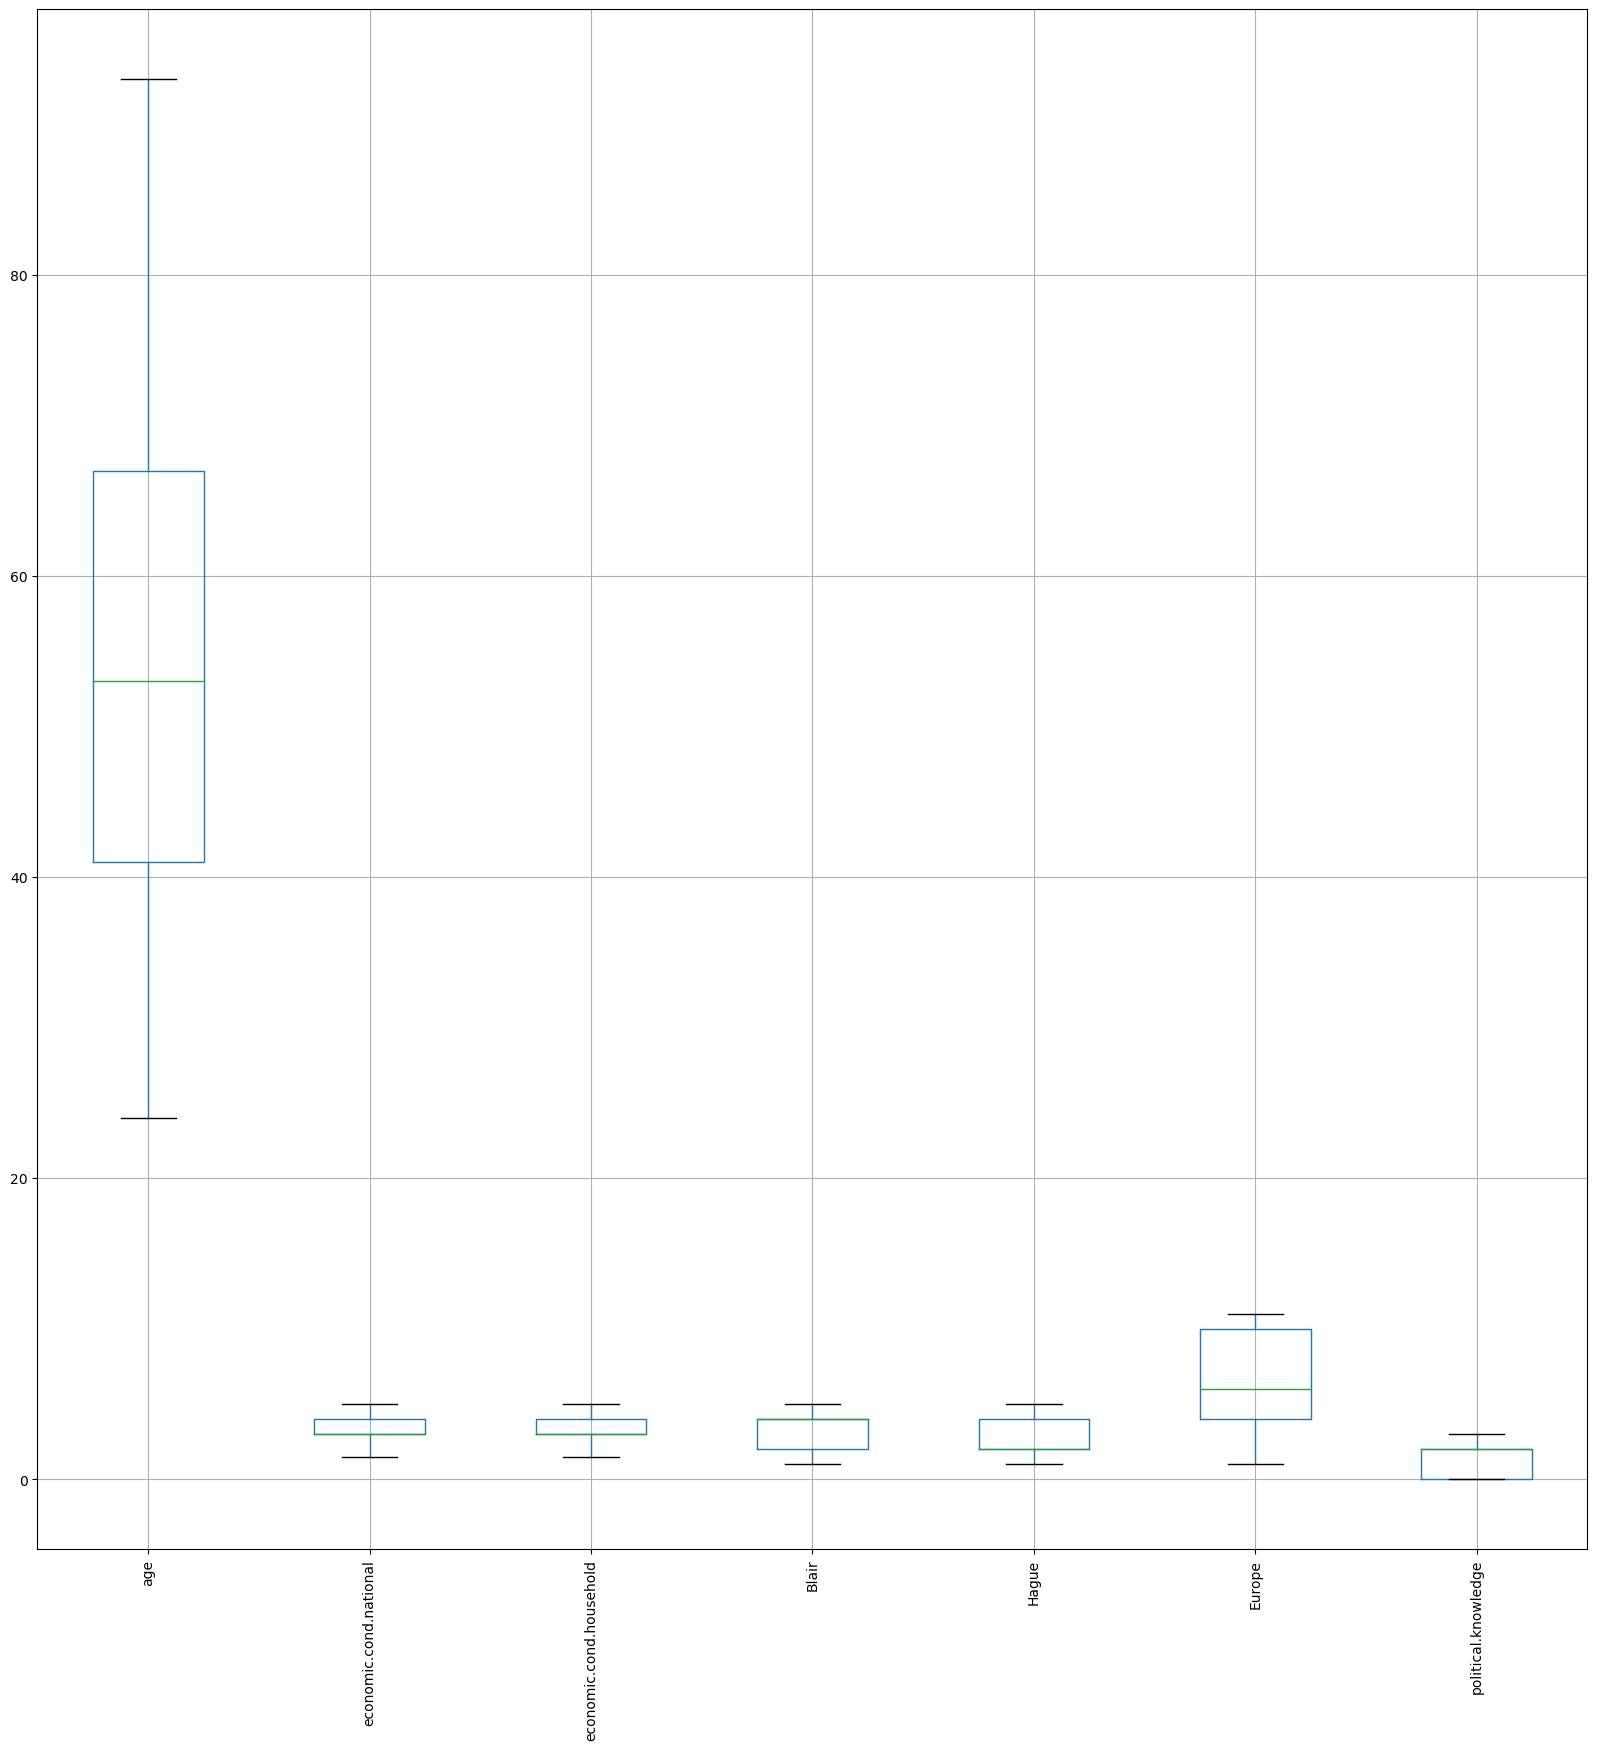

In [33]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [34]:
## Converting the other 'object' type variables as dummy variables

election_df_dummy = pd.get_dummies(election_df,dtype='int',drop_first=True)
election_df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   economic.cond.national   1517 non-null   int64
 2   economic.cond.household  1517 non-null   int64
 3   Blair                    1517 non-null   int64
 4   Hague                    1517 non-null   int64
 5   Europe                   1517 non-null   int64
 6   political.knowledge      1517 non-null   int64
 7   vote_Labour              1517 non-null   int32
 8   gender_male              1517 non-null   int32
dtypes: int32(2), int64(7)
memory usage: 106.7 KB


### Train Test Split

In [35]:
# Copy all the predictor variables into X dataframe
X = election_df_dummy.drop(['vote_Labour'], axis=1)

# Copy target into the y dataframe. 
y = election_df_dummy['vote_Labour']

In [36]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

X = X.apply(zscore)  # convert all attributes to Z scale 

X.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
count,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03
mean,-9.367735e-18,1.967224e-16,-1.077290e-16,3.747094e-17,1.053870e-16,4.332578e-17,-4.215481e-17,-9.367735e-18
std,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00
min,-1.926617e+00,-2.547041e+00,-2.296796e+00,-1.988727e+00,-1.419969e+00,-1.740556e+00,-1.421084e+00,-9.367365e-01
25%,-8.435773e-01,-2.781853e-01,-1.480205e-01,-1.137217e+00,-6.083289e-01,-8.309016e-01,-1.421084e+00,-9.367365e-01
50%,-7.907881e-02,-2.781853e-01,-1.480205e-01,5.658022e-01,-6.083289e-01,-2.244654e-01,4.238322e-01,-9.367365e-01
75%,8.128361e-01,8.562424e-01,9.263674e-01,5.658022e-01,1.014951e+00,9.884072e-01,4.238322e-01,1.067536e+00
max,2.469250e+00,1.990670e+00,2.000755e+00,1.417312e+00,1.826592e+00,1.291625e+00,1.346290e+00,1.067536e+00


In [37]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=election_df_dummy['vote_Labour'])

In [38]:
KNC = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [39]:
KNC.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [183]:
# Accuracy - Test Data
KNC.score(X_train, y_train)

1.0

##### 
- **AUC Value closer to 1 tells that there is good seperatibility between the predicted classes and thus the model is good for prediction**

- **ROC Curve visually represents the above concept where the plot should be as far as possible from the diagnol.**


### AUC and ROC for the training data

AUC: 1.000


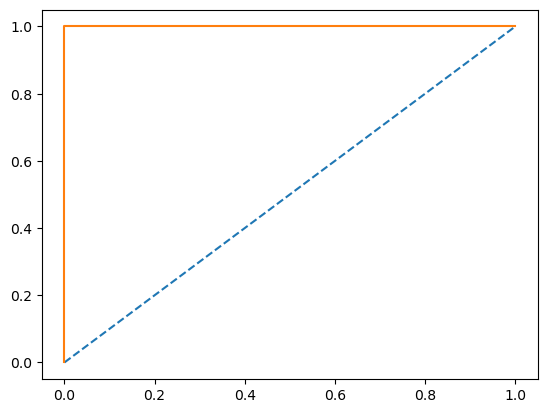

In [42]:
# predict probabilities
probs = KNC.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [43]:
# Accuracy - Test Data
KNC.score(X_test, y_test)

0.831140350877193

### AUC and ROC for the test data

AUC: 1.000


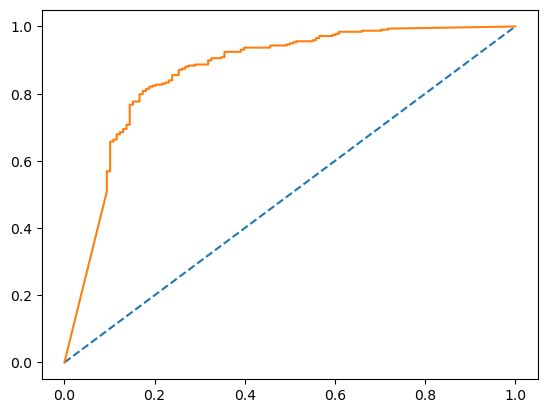

In [44]:
# predict probabilities
probs = KNC.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [45]:
ytrain_predict = KNC.predict(X_train)
ytest_predict = KNC.predict(X_test)

In [46]:
confusion_matrix(y_train, ytrain_predict)

array([[322,   0],
       [  0, 739]], dtype=int64)

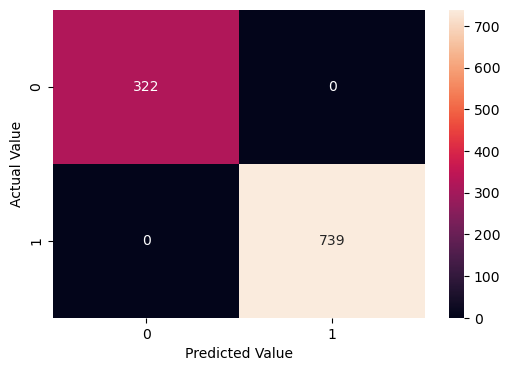

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [48]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



### Confusion Matrix for test data

In [49]:
confusion_matrix(y_test, ytest_predict)

array([[ 98,  40],
       [ 37, 281]], dtype=int64)

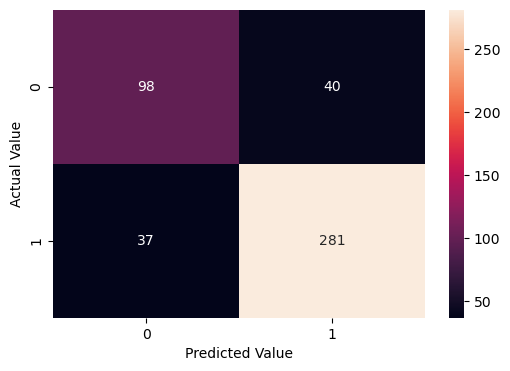

In [51]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [52]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       138
           1       0.88      0.88      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



### Gaussian Naive Bayes

In [53]:
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

##### 
- **AUC Value closer to 1 tells that there is good seperatibility between the predicted classes and thus the model is good for prediction**

- **ROC Curve visually represents the above concept where the plot should be as far as possible from the diagnol.**


### AUC and ROC for the training data

AUC: 0.873


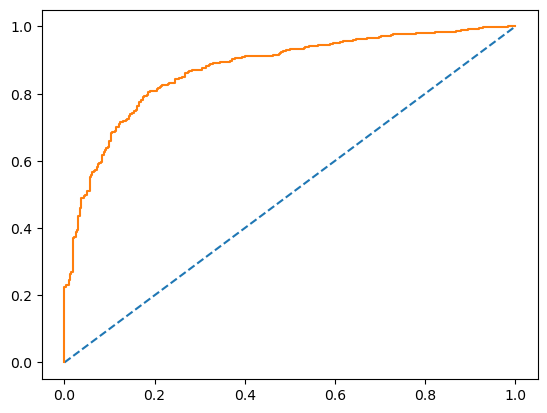

In [54]:
# predict probabilities
probs = NB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [184]:
# Accuracy - Test Data
NB.score(X_train, y_train)

0.8199811498586239

### AUC and ROC for the test data

AUC: 0.873


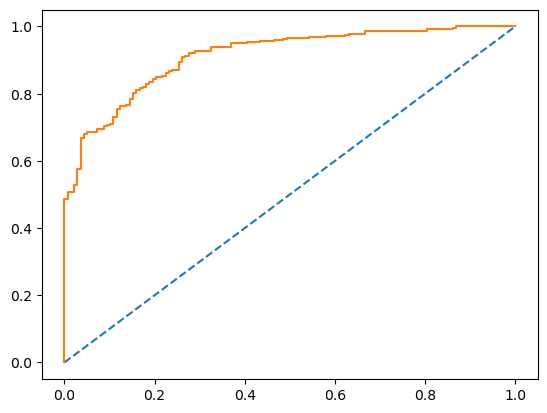

In [56]:
# predict probabilities
probs = NB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [57]:
ytrain_predict = NB.predict(X_train)
ytest_predict = NB.predict(X_test)

In [58]:
confusion_matrix(y_train, ytrain_predict)

array([[226,  96],
       [ 95, 644]], dtype=int64)

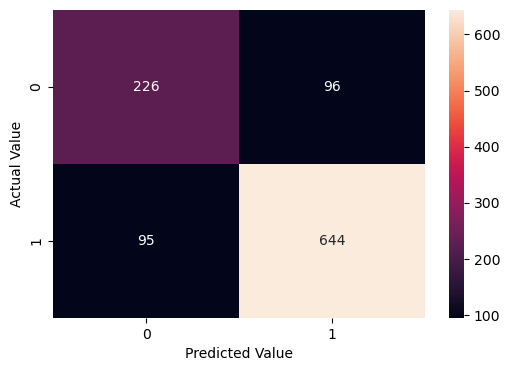

In [59]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [60]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [55]:
# Accuracy - Test Data
NB.score(X_test, y_test)

0.8574561403508771

### Confusion Matrix for test data

In [61]:
confusion_matrix(y_test, ytest_predict)

array([[100,  38],
       [ 27, 291]], dtype=int64)

In [62]:
cm = confusion_matrix(y_test, ytest_predict)
cm

array([[100,  38],
       [ 27, 291]], dtype=int64)

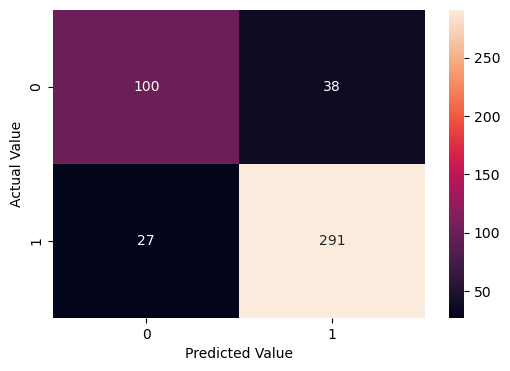

In [63]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [64]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



### Bagging

In [65]:


bgcl = BaggingClassifier( n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

##### 
- **AUC Value closer to 1 tells that there is good seperatibility between the predicted classes and thus the model is good for prediction**

- **ROC Curve visually represents the above concept where the plot should be as far as possible from the diagnol.**


### AUC and ROC for the training data

AUC: 1.000


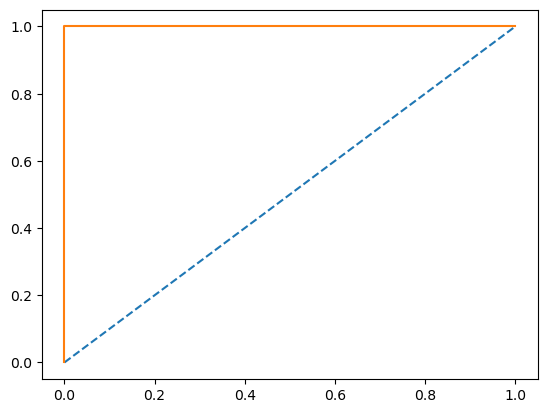

In [66]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [185]:
# Accuracy - Test Data
bgcl.score(X_train, y_train)

1.0

### AUC and ROC for the test data

AUC: 1.000


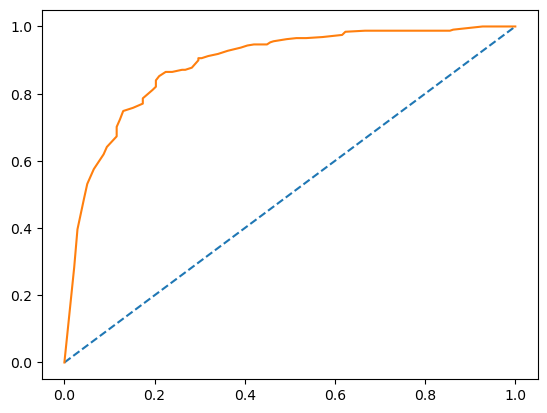

In [68]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [69]:
ytrain_predict = bgcl.predict(X_train)
ytest_predict = bgcl.predict(X_test)

In [70]:
confusion_matrix(y_train, ytrain_predict)

array([[322,   0],
       [  0, 739]], dtype=int64)

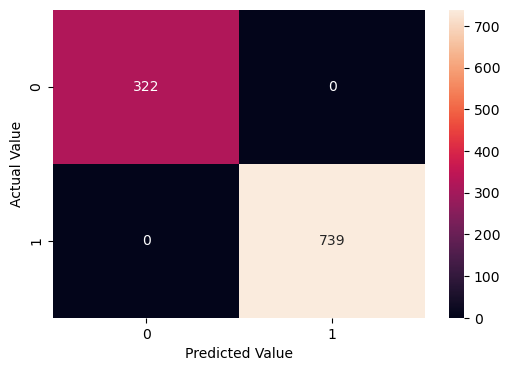

In [71]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [72]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [67]:
# Accuracy - Test Data
bgcl.score(X_test, y_test)

0.8442982456140351

### Confusion Matrix for test data

In [73]:
confusion_matrix(y_test, ytest_predict)

array([[ 97,  41],
       [ 30, 288]], dtype=int64)

In [74]:
cm = confusion_matrix(y_test, ytest_predict)
cm

array([[ 97,  41],
       [ 30, 288]], dtype=int64)

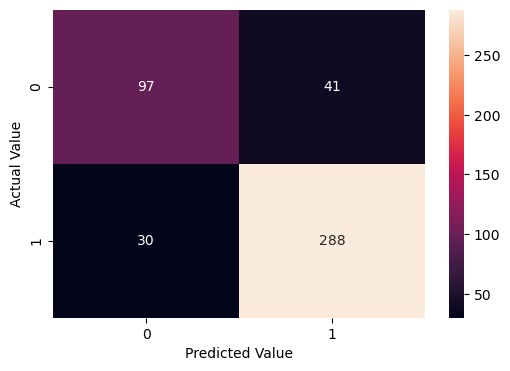

In [75]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [76]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       138
           1       0.88      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



### Boosting

In [77]:

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

##### 
- **AUC Value closer to 1 tells that there is good seperatibility between the predicted classes and thus the model is good for prediction**

- **ROC Curve visually represents the above concept where the plot should be as far as possible from the diagnol.**


### AUC and ROC for the training data

AUC: 0.887


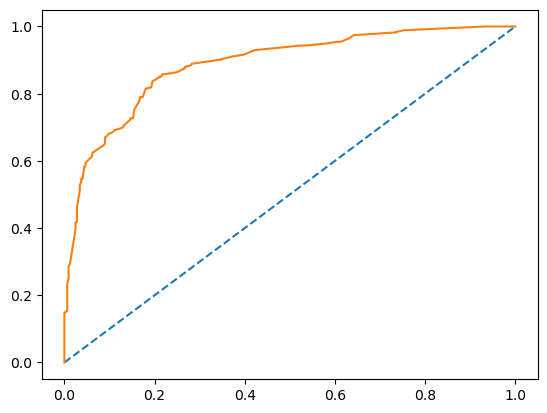

In [78]:
# predict probabilities
probs = abcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [187]:
# Accuracy - Test Data
abcl.score(X_train, y_train)

0.8341187558906692

### AUC and ROC for the test data

AUC: 0.887


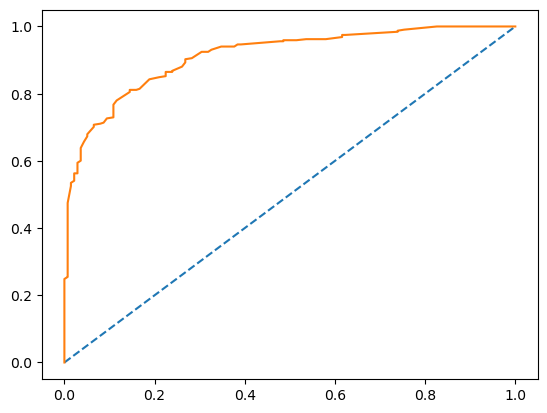

In [80]:
# predict probabilities
probs = abcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [81]:
ytrain_predict = abcl.predict(X_train)
ytest_predict = abcl.predict(X_test)

In [82]:
confusion_matrix(y_train, ytrain_predict)

array([[232,  90],
       [ 86, 653]], dtype=int64)

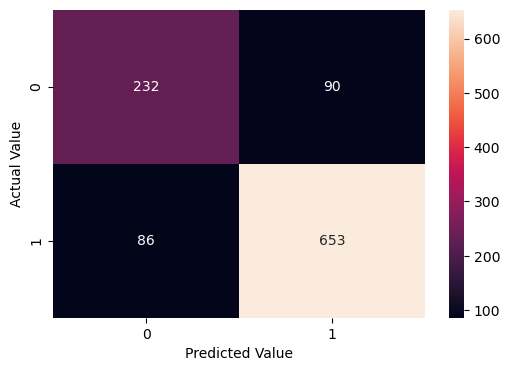

In [83]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [84]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       322
           1       0.88      0.88      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.80      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [188]:
# Accuracy - Test Data
abcl.score(X_test, y_test)

0.8508771929824561

### Confusion Matrix for test data

In [86]:
cm = confusion_matrix(y_test, ytest_predict)
cm

array([[101,  37],
       [ 31, 287]], dtype=int64)

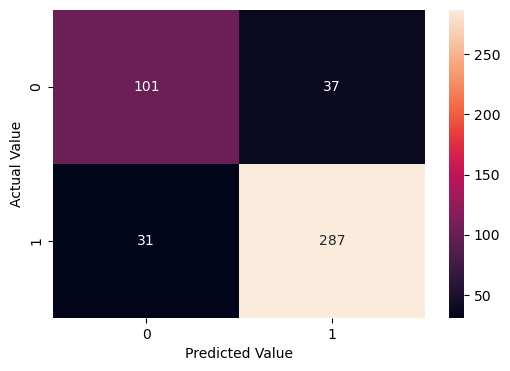

In [87]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [88]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       138
           1       0.89      0.90      0.89       318

    accuracy                           0.85       456
   macro avg       0.83      0.82      0.82       456
weighted avg       0.85      0.85      0.85       456



### GridSearch on Bagging

In [89]:
parameters = {
    'n_estimators': [20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}


grid_search = GridSearchCV(estimator = bgcl,param_grid=parameters,  cv = 5,n_jobs=-1)

In [90]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(n_estimators=50, random_state=1),
             n_jobs=-1,
             param_grid={'n_estimators': [20, 50, 100, 200, 300, 400, 500, 600,
                                          700, 800, 900, 1000]})

In [91]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'n_estimators': 900} 

BaggingClassifier(n_estimators=900, random_state=1)


In [92]:
best_model = grid_search.best_estimator_

In [93]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [94]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.340000,0.660000
1,0.623333,0.376667
2,0.094444,0.905556
3,0.050000,0.950000
4,0.177778,0.822222


### AUC and ROC for the training data

AUC: 1.000


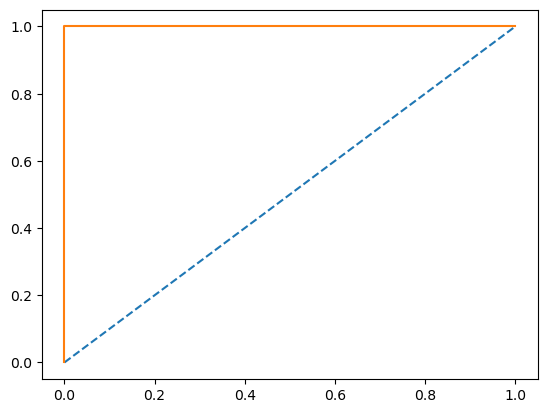

In [95]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [96]:
# Accuracy - Test Data
best_model.score(X_test, y_test)

0.8377192982456141

### AUC and ROC for the test data

AUC: 1.000


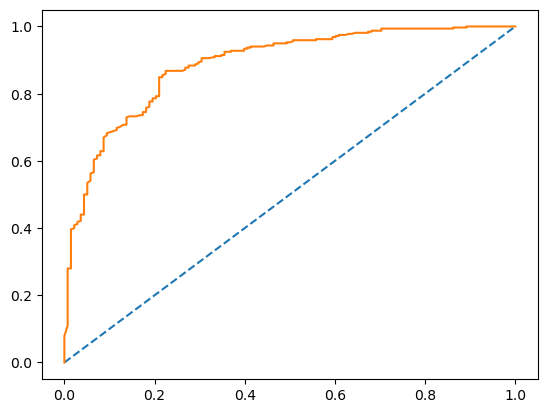

In [97]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [99]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [100]:
confusion_matrix(y_train, ytrain_predict)

array([[322,   0],
       [  0, 739]], dtype=int64)

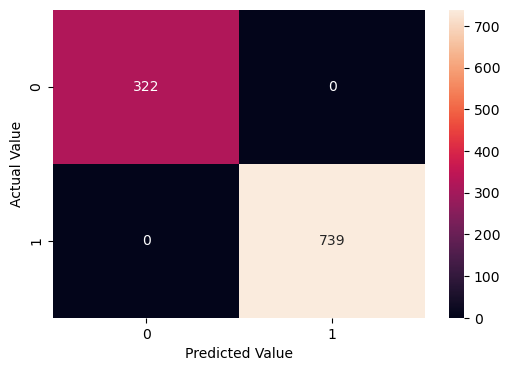

In [101]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [102]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



### Confusion Matrix for test data

In [104]:
cm = confusion_matrix(y_test, ytest_predict)
cm

array([[ 92,  46],
       [ 28, 290]], dtype=int64)

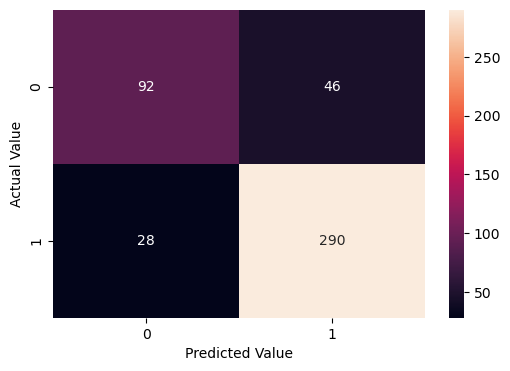

In [105]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [106]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71       138
           1       0.86      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



### GridSearch on Boosting

In [107]:
parameters = {
    'n_estimators': [20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}


grid_search = GridSearchCV(estimator = abcl,param_grid=parameters,  cv = 5,n_jobs=-1)

In [108]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(n_estimators=10, random_state=1),
             n_jobs=-1,
             param_grid={'n_estimators': [20, 50, 100, 200, 300, 400, 500, 600,
                                          700, 800, 900, 1000]})

In [109]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'n_estimators': 20} 

AdaBoostClassifier(n_estimators=20, random_state=1)


In [110]:
best_model = grid_search.best_estimator_

In [111]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [112]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.487045,0.512955
1,0.506748,0.493252
2,0.478472,0.521528
3,0.461791,0.538209
4,0.477680,0.522320


### AUC and ROC for the training data

AUC: 0.895


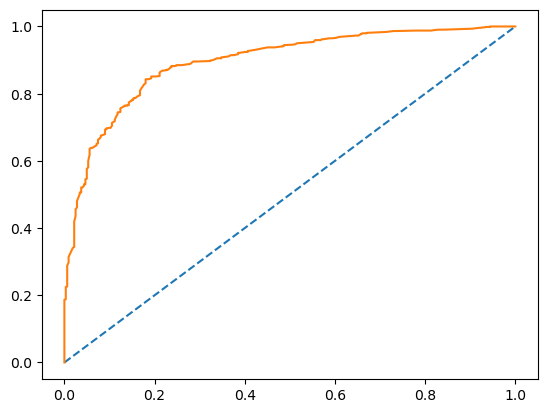

In [113]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [114]:
# Accuracy - Test Data
best_model.score(X_test, y_test)

0.8486842105263158

### AUC and ROC for the test data

AUC: 0.895


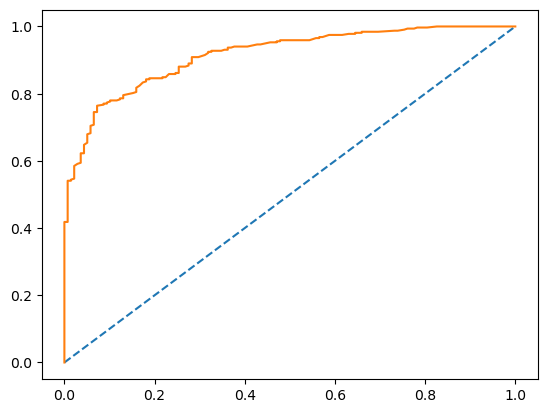

In [115]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [116]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[218, 104],
       [ 75, 664]], dtype=int64)

### Confusion Matrix for the training data

In [117]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [118]:
confusion_matrix(y_train, ytrain_predict)

array([[218, 104],
       [ 75, 664]], dtype=int64)

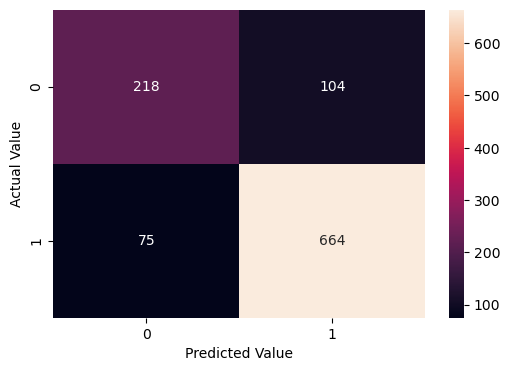

In [119]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [120]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



### Confusion Matrix for test data

In [121]:
confusion_matrix(y_test, ytest_predict)

array([[ 94,  44],
       [ 25, 293]], dtype=int64)

In [122]:
cm = confusion_matrix(y_test, ytest_predict)
cm

array([[ 94,  44],
       [ 25, 293]], dtype=int64)

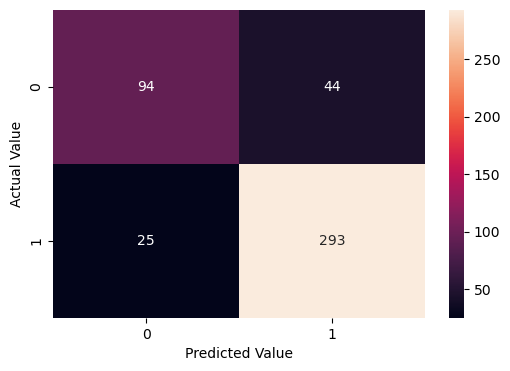

In [123]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [124]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       138
           1       0.87      0.92      0.89       318

    accuracy                           0.85       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.85      0.85      0.85       456



In [189]:
print (pd.DataFrame(abcl.feature_importances_, columns = ["Imp"], index = X_train.columns))


                         Imp
age                      0.2
economic.cond.national   0.1
economic.cond.household  0.0
Blair                    0.2
Hague                    0.2
Europe                   0.2
political.knowledge      0.1
gender_male              0.0
